# CHW17-2 과점 모형
### 박태원, 김승표, 문성재, 심은섭, 장하준

In [167]:
import numpy as np
import math
from scipy.optimize import minimize
from sympy import Symbol, solve
from sympy import symbols
from pprint import pprint
import matplotlib.pyplot as plt

# 크루노 내쉬 균형 구하기

#값을 고정해놓을 변수
staticQ1 = 1
staticQ2 = 1

#pie1 계산
def pie1(q1):
    q = q1+staticQ2
    return -(price(q)*q1 - 5*q1)

#pie2 계산
def pie2(q2):
    q = staticQ1+q2
    return -(price(q)*q2 - 0.5*(q2**2))

#가격 함수, 여러 셀에 걸쳐서 활용됨
def price(q):
    return 100 - 0.8*q

for i in range(1,100):
    staticQ1 = minimize(pie1, 0, method='SLSQP').x
    staticQ2 = minimize(pie2, 0, method="SLSQP").x
    
print(staticQ1, staticQ2)

[47.44317489] [23.86363849]


In [168]:
# 스타켈버그 내쉬 균형 구하기

def q2(q1):
    return (100/2.6)-(0.8/2.6)*q1

def pie1(q1):
    q = q1+q2(q1) 
    return -(price(q)*q1 - 5*q1)

optimizedQ1 = minimize(pie1, 0, method='SLSQP').x
print(optimizedQ1, q2(optimizedQ1))

[57.98612332] [20.61965436]


[{q1: -q2 - 0.125*sqrt(-40.0*q2**2 + 400.0*q2 + 225625.0) + 59.375},
 {q1: -q2 + 0.125*sqrt(-40.0*q2**2 + 400.0*q2 + 225625.0) + 59.375}]


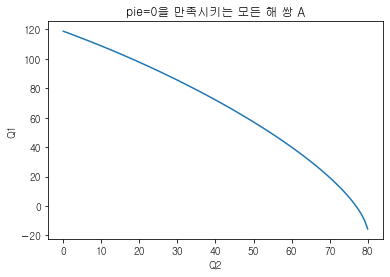

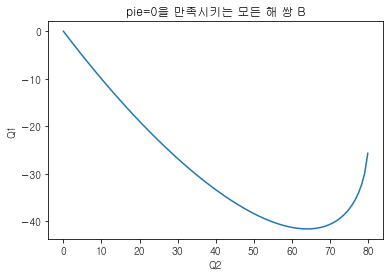

In [173]:
# 완전경쟁시장 균형 구하기

q1, q2 = symbols('q1, q2')

#pie = 0을 풀어줌
pie1 = price(q1 + q2)*q1 - 5*q1
pie2 = price(q1 + q2)*q2 - 0.5*(q2**2)
pie = pie1 + pie2
res = solve(pie, dict=True)
pprint(res)

def q1A(q2):
    return -q2 + 0.125*np.sqrt(-40.0*q2**2 + 400.0*q2 + 225625.0) + 59.375

def q1B(q2):
    return -q2 - 0.125*np.sqrt(-40.0*q2**2 + 400.0*q2 + 225625.0) + 59.375

plt.rc("font", family="Gulim")

x_val = np.linspace(0, 80, 100)
plt.title("pie=0을 만족시키는 모든 해 쌍 A")
plt.plot(x_val, q1A(x_val))
plt.xlabel('Q2')
plt.ylabel('Q1')
plt.show()

x_val = np.linspace(0, 80, 100)
plt.title("pie=0을 만족시키는 모든 해 쌍 B")
plt.plot(x_val, q1B(x_val))
plt.xlabel('Q2')
plt.ylabel('Q1')
plt.show()

In [170]:
#독점경쟁시장

def pie(q):
    q1, q2 = q
    pie1 = price(q1 + q2)*q1 - 5*q1
    pie2 = price(q1 + q2)*q2 - 0.5*(q2**2)
    return -(pie1 + pie2)

optimizedPie = minimize(pie, (0, 0), method="SLSQP")
print(optimizedPie.x)

[54.37483777  5.00008342]


In [171]:
# 3개 기업에 대한 크루노 내쉬 균형

staticQ1 = 1
staticQ2 = 1
staticQ3 = 1

#pie1 계산
def pie1(q1):
    q = q1+staticQ2+staticQ3
    return -(price(q)*q1 - 5*q1)

#pie2 계산
def pie2(q2):
    q = staticQ1+q2+staticQ3
    return -(price(q)*q2 - 0.5*(q2**2))

#pie3 계산
def pie3(q3):
    q = staticQ1+staticQ2+q3
    return -(price(q)*q3 - 0.05*(q3**3))

for i in range(1,100):
    staticQ1 = minimize(pie1, 0, method='SLSQP').x
    staticQ2 = minimize(pie2, 0, method="SLSQP").x
    staticQ3 = minimize(pie3, 0, method="SLSQP").x
    
print(staticQ1, staticQ2, staticQ3)

[41.88900608] [21.3951167] [13.5768659]
